<a href="https://colab.research.google.com/github/antonioalbanese/Time-Series-Anomaly-Detection-An-experimental-survey/blob/main/results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

excel = pd.read_excel("ris.xlsx")
excel.columns = ['SEED', 'SEQ_LEN', 'DATASET', 'METHOD', 'THRESHOLD', 'True-f1',
       'weighted-f1', 'accuracy', 'true_recall', 'true_precision',
       'weighted_recall', 'weighted_precision', 'epoch_time']

lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

## SEQ_LEN_METHOD


Print F1 per each METHOD for each SEQ_LEN of all DATASET at varying of THRESHOLD

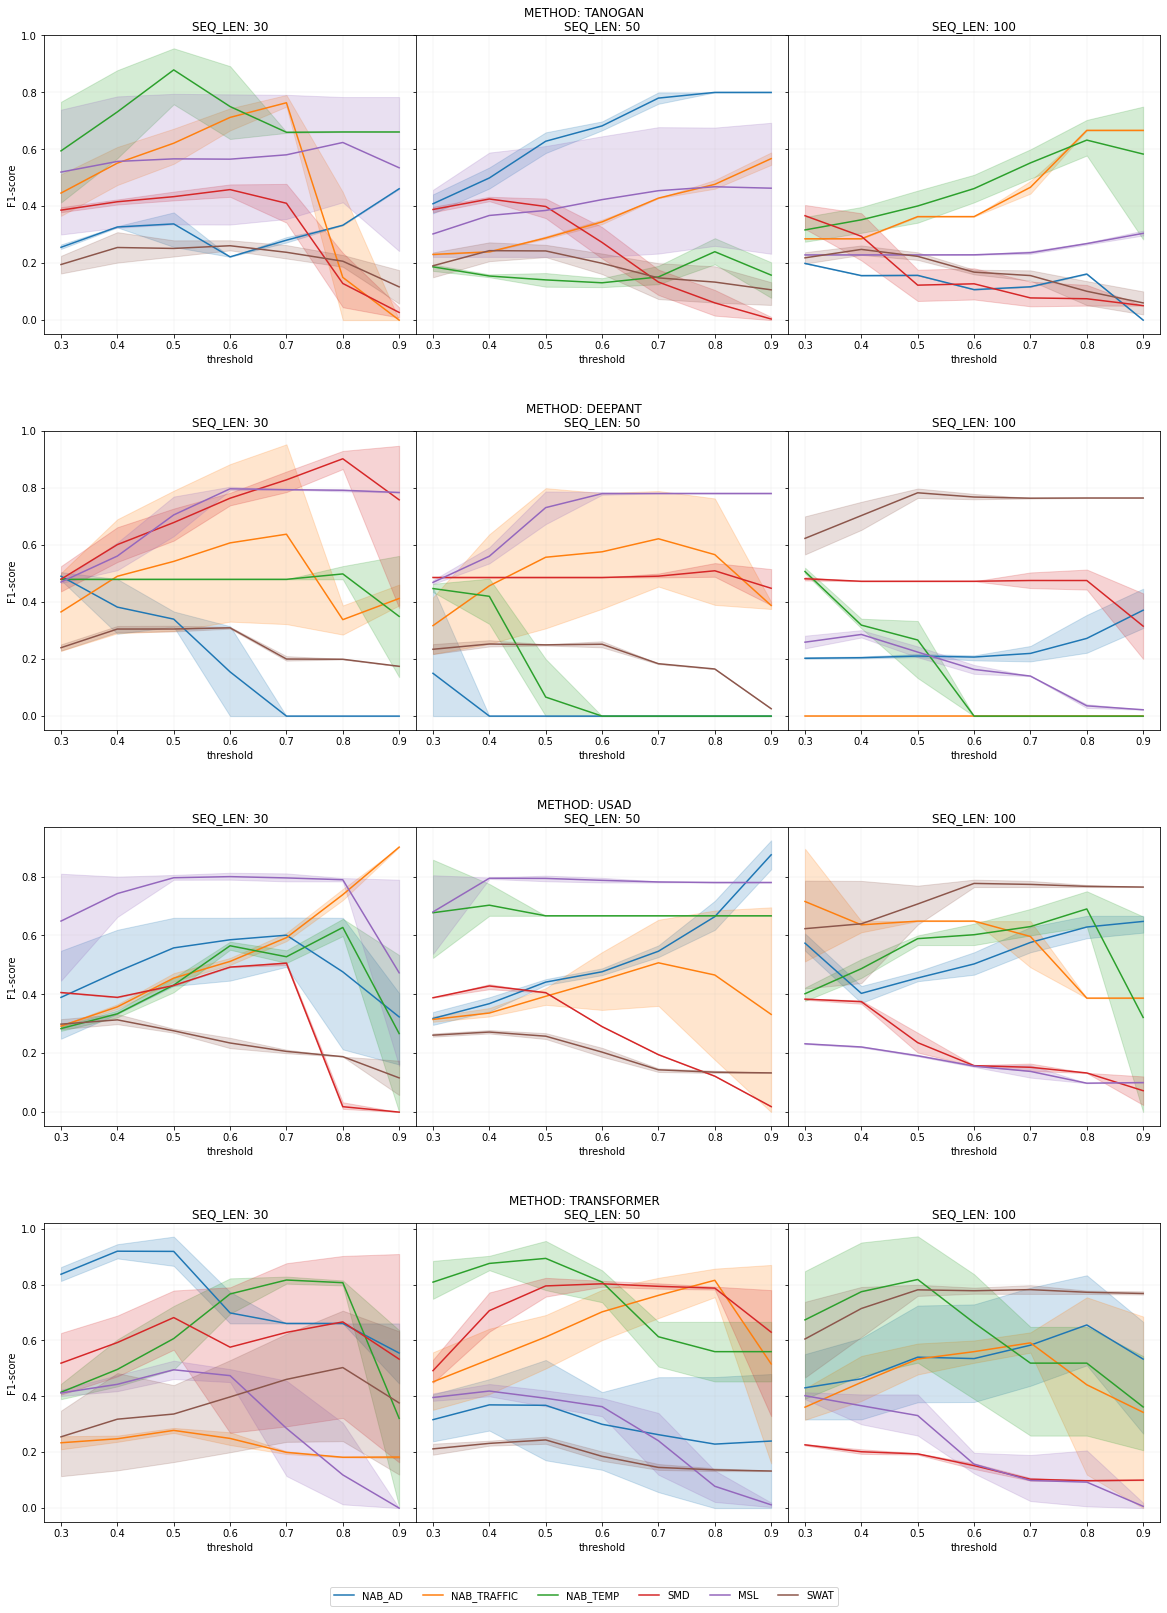

In [93]:
fig = plt.figure(figsize=(20,22))
subfigs = fig.subfigures(nrows=4, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, m in zip(subfigs, excel.METHOD.unique()):
  row.suptitle('METHOD: {}'.format(m), y=.95) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,l in zip(axs,excel.SEQ_LEN.unique()): 
    data = excel[(excel['METHOD'] == m) & (excel['SEQ_LEN']==l)]
    sns.lineplot(data=data, x='THRESHOLD', y='True-f1', hue='DATASET', ax=ax)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("SEQ_LEN: {}".format(l), pad=5)
    ax.set(xlabel="threshold",ylabel="F1-score")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=6, bbox_to_anchor=(0.5,-0.025))
plt.show()
print("\n\n")

## SEQ_LEN_DS


Print F1 per each DATASET for each SEQ_LEN of all METHOD at varying of THRESHOLD

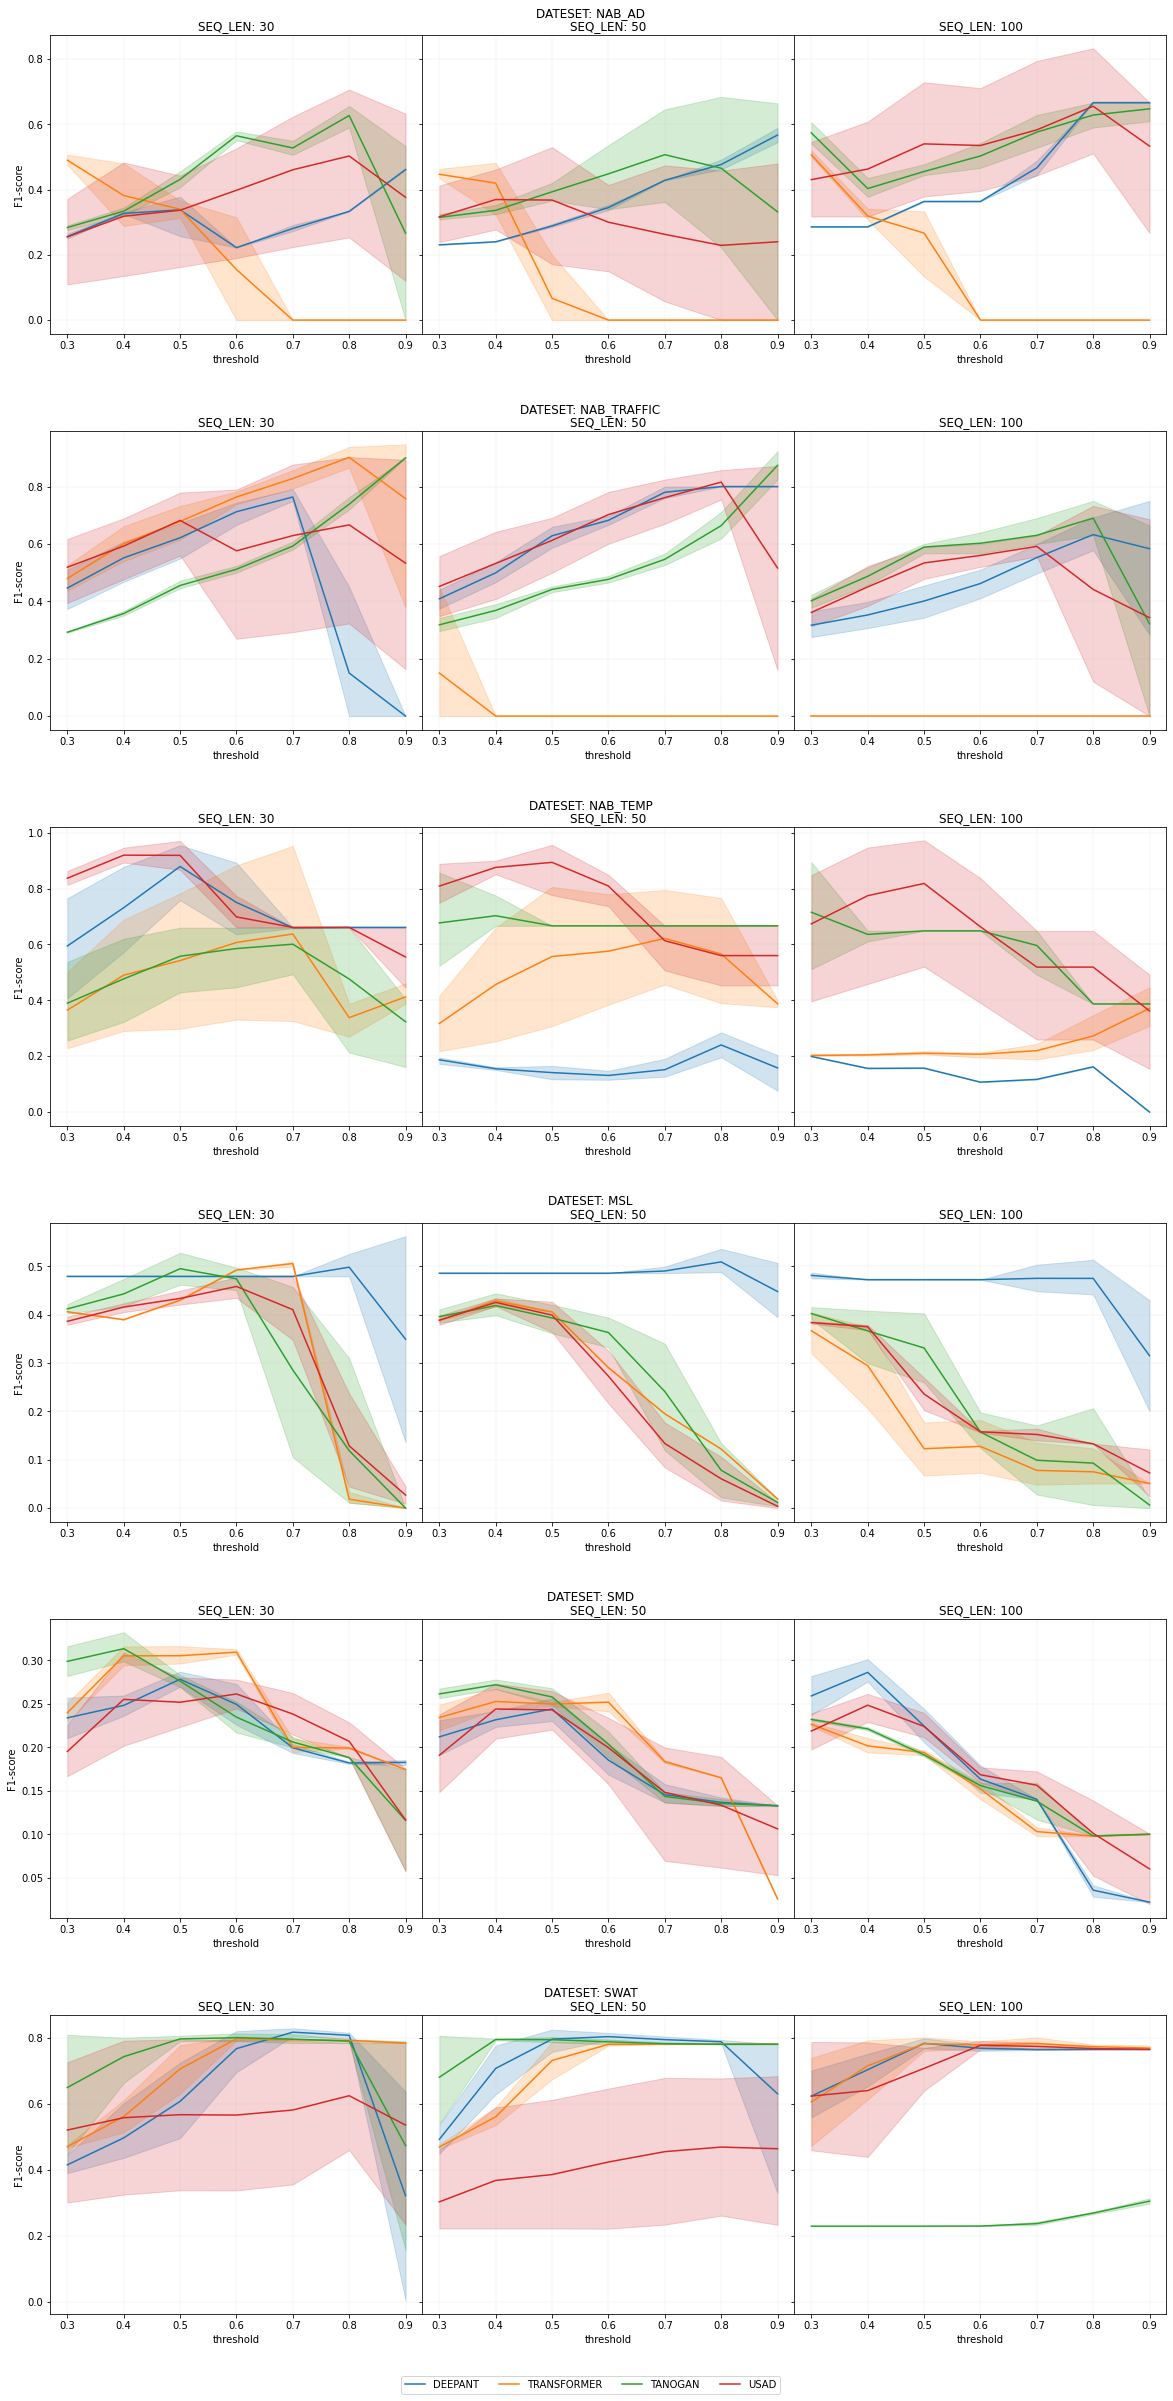

In [97]:
fig = plt.figure(figsize=(20,33))
subfigs = fig.subfigures(nrows=6, ncols=1, hspace=3)
# fig, axs = plt.subplots(6, 3, figsize=(20,36), sharey='row', subplot_kw=dict(frameon=True))
# plt.subplots_adjust(wspace=.0, hspace=0.5)
for row, d in zip(subfigs, excel.DATASET.unique()):
  row.suptitle('DATESET: {}'.format(d), y=.95) 
  axs = row.subplots(nrows=1, ncols=3, sharey="row")
  row.subplots_adjust(wspace=.0)
  for ax,l in zip(axs,excel.SEQ_LEN.unique()): 
    data = excel[(excel['DATASET'] == d) & (excel['SEQ_LEN']==l)]
    sns.lineplot(data=data, x='THRESHOLD', y='True-f1', hue='METHOD', ax=ax)
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.1)
    ax.set_title("SEQ_LEN: {}".format(l), pad=5)
    ax.set(xlabel="threshold",ylabel="F1-score")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,-0.015))
plt.show()
print("\n\n")

## MAX_F1_DS


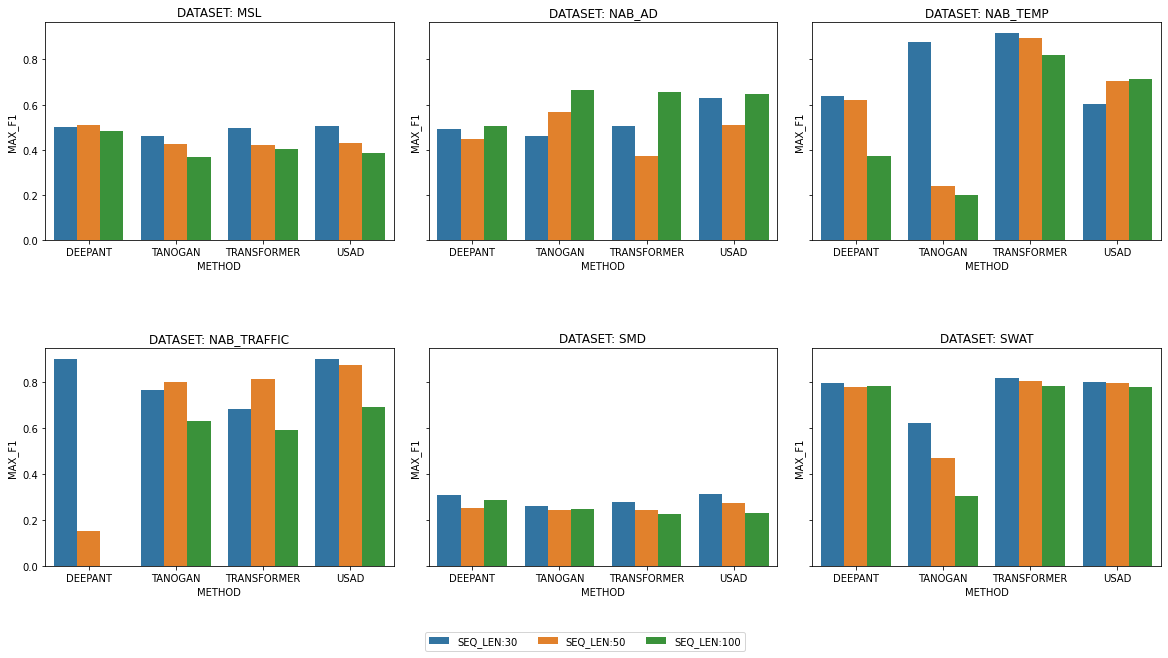

In [112]:
query = """
SELECT DATASET, METHOD, SEQ_LEN, MAX("True-f1") as MAX_F1
FROM means
GROUP BY DATASET, METHOD, SEQ_LEN
"""

max_seq_len = ps.sqldf(query)

fig, axs = plt.subplots(2,3, figsize=(20,10), sharey='row', subplot_kw=dict(frameon=True))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
for ax,d in zip(axs.flatten(),max_seq_len.DATASET.unique()):
  #fig, axs = plt.subplots(1, 1, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  data = max_seq_len[max_seq_len['DATASET'] == d]
  sns.barplot(data = data, hue='SEQ_LEN', y='MAX_F1', x='METHOD', ax=ax)
  handles, labels = ax.get_legend_handles_labels()
  ax.get_legend().remove()
  ax.set_title("DATASET: {}".format(d))
labels = ["SEQ_LEN:{}".format(l) for l in labels]
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,0))
plt.show()

## MAX_F1_METHOD


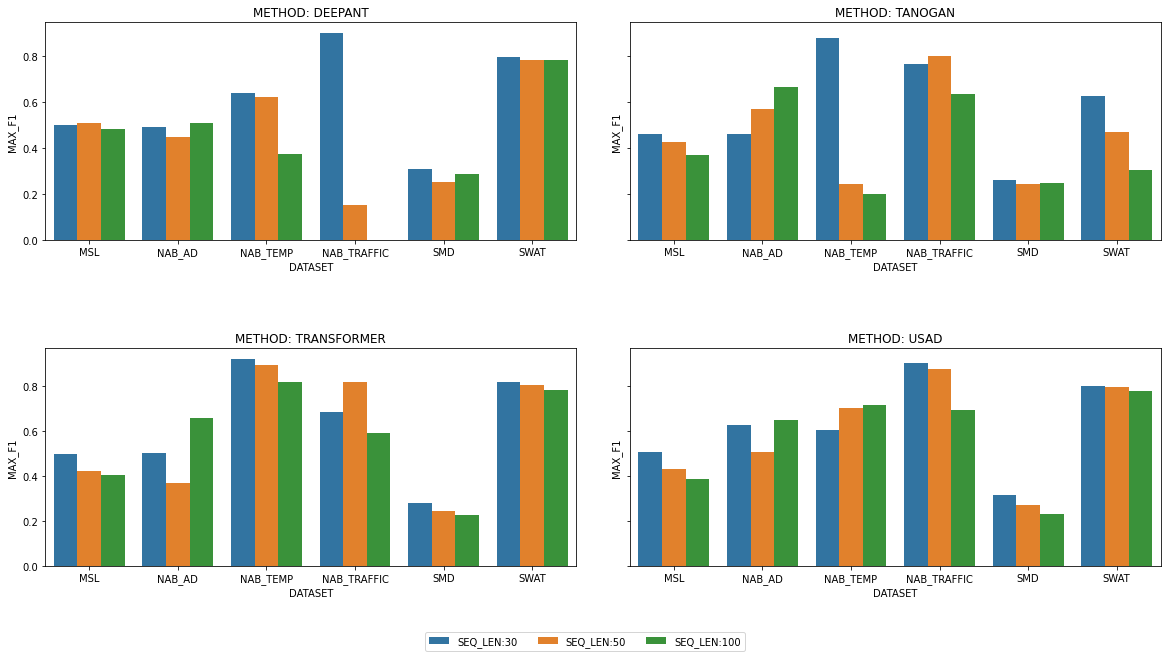

In [111]:
query = """
SELECT DATASET, METHOD, SEQ_LEN, MAX("True-f1") as MAX_F1
FROM means
GROUP BY DATASET, METHOD, SEQ_LEN
"""

max_seq_len = ps.sqldf(query)

fig, axs = plt.subplots(2,2, figsize=(20,10), sharey='row', subplot_kw=dict(frameon=True))
plt.subplots_adjust(hspace=0.5, wspace=0.1)
for ax,d in zip(axs.flatten(),max_seq_len.METHOD.unique()):
  #fig, axs = plt.subplots(1, 1, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  data = max_seq_len[max_seq_len['METHOD'] == d]
  sns.barplot(data = data, hue='SEQ_LEN', y='MAX_F1', x='DATASET', ax=ax)
  handles, labels = ax.get_legend_handles_labels()
  ax.get_legend().remove()
  ax.set_title("METHOD: {}".format(d))
labels = ["SEQ_LEN:{}".format(l) for l in labels]
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5,0))
plt.show()

## TABLE: MAX_F1_DS

print per each dataset the number of times a SEQ_LEN obtain the max result 


In [105]:
q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1
       FROM means_seed
       GROUP BY "DATASET", "METHOD" 
        """

step1 = ps.sqldf(q)

q = """
    SELECT DATASET, METHOD, SEQ_LEN, COUNT(SEQ_LEN) AS CNT
    FROM step1 
    GROUP BY "DATASET", "SEQ_LEN"

     """
temp = ps.sqldf(q)
q = """
SELECT DATASET, SEQ_LEN, CNT
FROM temp 
"""
ps.sqldf(q)

DATASET  SEQ_LEN  CNT
0          MSL       30    3
1          MSL       50    1
2       NAB_AD      100    4
3     NAB_TEMP       30    3
4     NAB_TEMP      100    1
5  NAB_TRAFFIC       30    2
6  NAB_TRAFFIC       50    2
7          SMD       30    4
8         SWAT       30    4

## MORE

In [13]:
means_seed = excel.groupby(['DATASET','METHOD','SEQ_LEN','THRESHOLD']).mean().reset_index()

In [16]:
means_seed

DATASET   METHOD  SEQ_LEN  THRESHOLD  SEED   True-f1  weighted-f1  \
0       MSL  DEEPANT       30        0.3   3.0  0.479355     0.821388   
1       MSL  DEEPANT       30        0.4   3.0  0.479355     0.821388   
2       MSL  DEEPANT       30        0.5   3.0  0.479355     0.821388   
3       MSL  DEEPANT       30        0.6   3.0  0.479355     0.821388   
4       MSL  DEEPANT       30        0.7   3.0  0.479355     0.821388   
..      ...      ...      ...        ...   ...       ...          ...   
499    SWAT     USAD      100        0.5   3.0  0.706793     0.922835   
500    SWAT     USAD      100        0.6   3.0  0.776674     0.947860   
501    SWAT     USAD      100        0.7   3.0  0.773330     0.947423   
502    SWAT     USAD      100        0.8   3.0  0.766670     0.946013   
503    SWAT     USAD      100        0.9   3.0  0.764331     0.945521   

     accuracy  true_recall  true_precision  weighted_recall  \
0    0.789495     0.806780        0.340974         0.789495   
1    0.789495     0.806780        0.340974         0.789495   
2    0.789495     0.806780        0.340974         0.789495   
3    0.789495     0.806780        0.340974         0.789495   
4    0.789495     0.806780        0.340974         0.789495   
..        ...          ...             ...              ...   
499  0.922338     0.672509        0.809181         0.922338   
500  0.952301     0.642612        0.984345         0.952301   
501  0.952212     0.630584        1.000000         0.952212   
502  0.951056     0.621649        1.000000         0.951056   
503  0.950656     0.618557        1.000000         0.950656   

     weighted_precision  epoch_time  
0              0.892313    0.304622  
1              0.892313    0.304622  
2              0.892313    0.304622  
3              0.892313    0.304622  
4              0.892313    0.304622  
..                  ...         ...  
499            0.933600    1.395835  
500            0.954026    1.395835  
501            0.954702    1.395835  
502            0.953661    1.395835  
503            0.953302    1.395835  

[504 rows x 13 columns]

In [21]:
means = means_seed[['DATASET', 'METHOD', 'SEQ_LEN', 'True-f1']]

In [ ]:
means_seed[(means_seed['DATASET']=='NAB_AD') & (means_seed['SEQ_LEN'] == 100)].groupby('METHOD').max()

DATASET  SEQ_LEN  THRESHOLD  SEED   True-f1  weighted-f1  \
METHOD                                                                 
DEEPANT      NAB_AD      100        0.9   3.0  0.506667     0.586667   
TANOGAN      NAB_AD      100        0.9   3.0  0.666667     0.858974   
TRANSFORMER  NAB_AD      100        0.9   3.0  0.655556     0.833203   
USAD         NAB_AD      100        0.9   3.0  0.647619     0.847751   

             accuracy  true_recall  true_precision  weighted_recall  \
METHOD                                                                
DEEPANT      0.666667          1.0        0.339394         0.666667   
TANOGAN      0.875000          0.5        1.000000         0.875000   
TRANSFORMER  0.837500          0.8        0.800000         0.837500   
USAD         0.862500          1.0        0.933333         0.862500   

             weighted_precision  epoch_time  
METHOD                                       
DEEPANT                0.823838    0.282335  
TANOGAN                0.892857    0.256927  
TRANSFORMER            0.849870    0.339696  
USAD                   0.874542    0.281830

## TABLE: MAX_OVERALL

In [106]:
max_f1 = pd.DataFrame(columns=['DATASET', 'METHOD', 'MAX_F1', 'RECALL', 'PRECISION', 'SEED'])
for seed in [1,2,3,4,5]:
  q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, true_recall AS RECALL, true_precision AS PRECISION, SEED
         FROM excel
         WHERE "SEQ_LEN" = 30 AND "DATASET" in ('SWAT', 'SMD', 'MSL') AND SEED = {}
         GROUP BY "DATASET","METHOD"
      """.format(seed)

  max = ps.sqldf(q)
  max_f1 = pd.concat([max_f1, max]).reset_index().drop(columns='index')
for seed in [1,2,3,4,5]:
  q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, true_recall AS RECALL, true_precision AS PRECISION, SEED
        FROM excel
        WHERE "SEQ_LEN" = 100 AND "DATASET" in ('NAB_AD') AND SEED = {}
        GROUP BY "DATASET","METHOD"
        """.format(seed)

  max = ps.sqldf(q)
  max_f1= pd.concat([max_f1, max]).reset_index().drop(columns="index")

max_f1

DATASET       METHOD    MAX_F1    RECALL  PRECISION SEED  SEQ_LEN
0      MSL      DEEPANT  0.579710  0.610169   0.552147    1     30.0
1      MSL      TANOGAN  0.482663  0.589831   0.408451    1     30.0
2      MSL  TRANSFORMER  0.538336  0.559322   0.518868    1     30.0
3      MSL         USAD  0.509554  0.542373   0.480480    1     30.0
4      SMD      DEEPANT  0.305794  0.218057   0.511670    1     30.0
..     ...          ...       ...       ...        ...  ...      ...
75  NAB_AD         USAD  0.666667  0.500000   1.000000    4    100.0
76  NAB_AD      DEEPANT  0.533333  1.000000   0.363636    5    100.0
77  NAB_AD      TANOGAN  0.666667  0.500000   1.000000    5    100.0
78  NAB_AD  TRANSFORMER  0.666667  0.500000   1.000000    5    100.0
79  NAB_AD         USAD  0.666667  0.500000   1.000000    5    100.0

[80 rows x 7 columns]

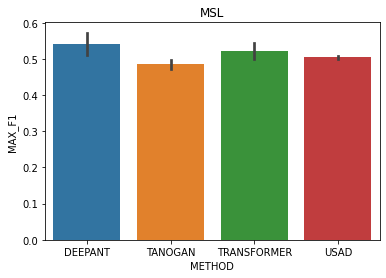

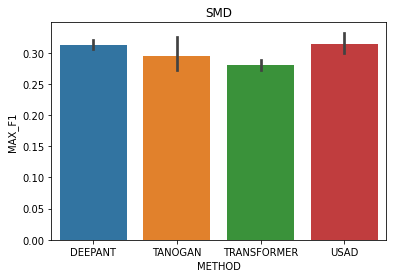

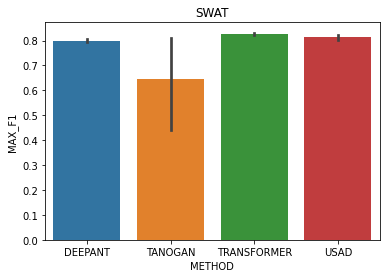

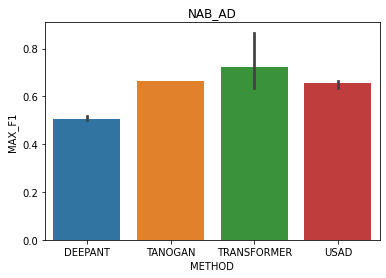

In [ ]:
for d in max_f1.DATASET.unique():
  data = max_f1[max_f1['DATASET']== d]
  sns.barplot(data = data, x="METHOD",y="MAX_F1")
  plt.title(d)
  plt.show()
  print()

- MSL-DEEPANT ha un 0.498 con SEQ_LEN = 30 e 0.509 con SEQ_LEN=50 threshold entrambe a 0.8
- NAB_TEMP-USAD ha un 0.6 con SEQ_LEN=30 e 0.71 con SEQ_LEN=50
- SU NAB_TEMP LE DIFFERENZE SONO MOLTO AMPIE 



SWAT


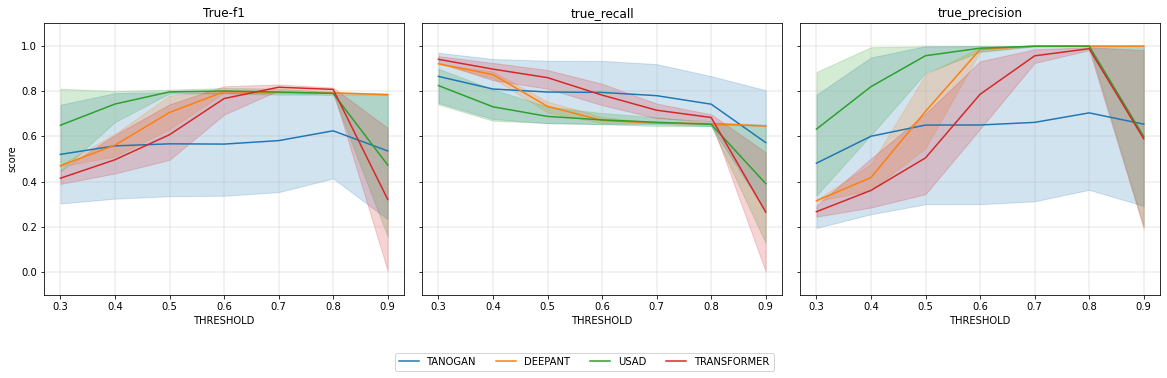


SMD


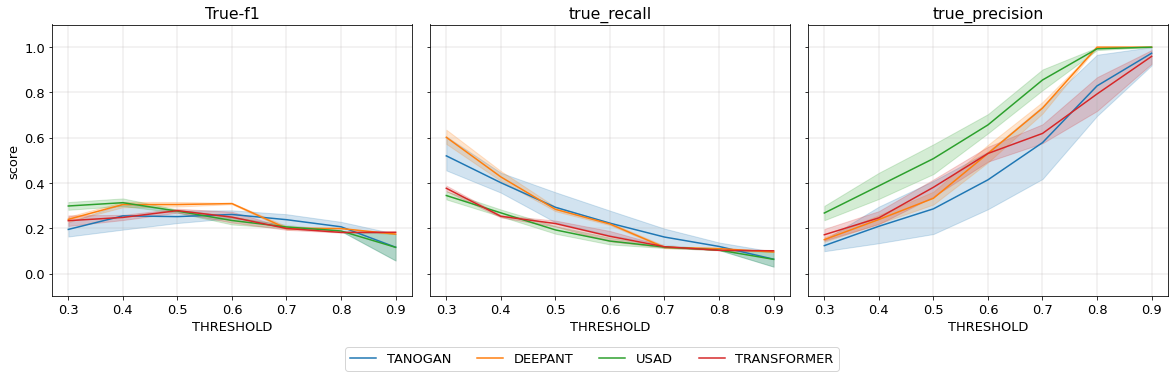


NAB_AD


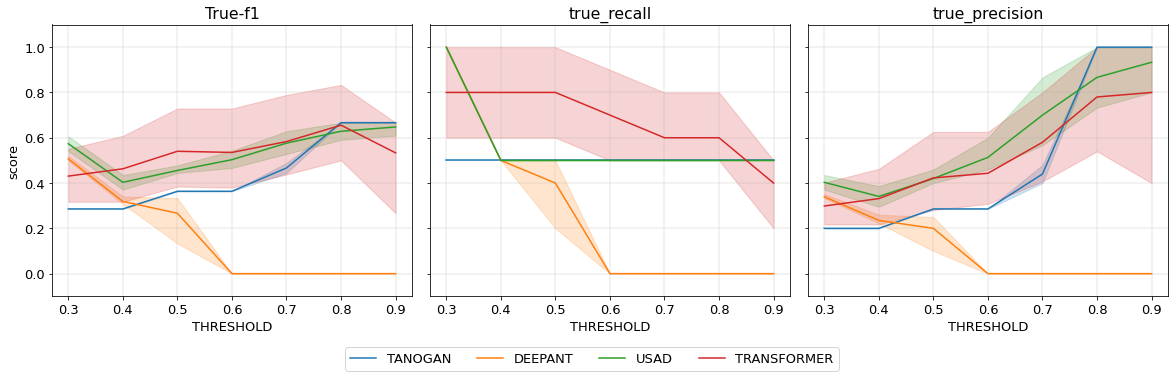


MSL


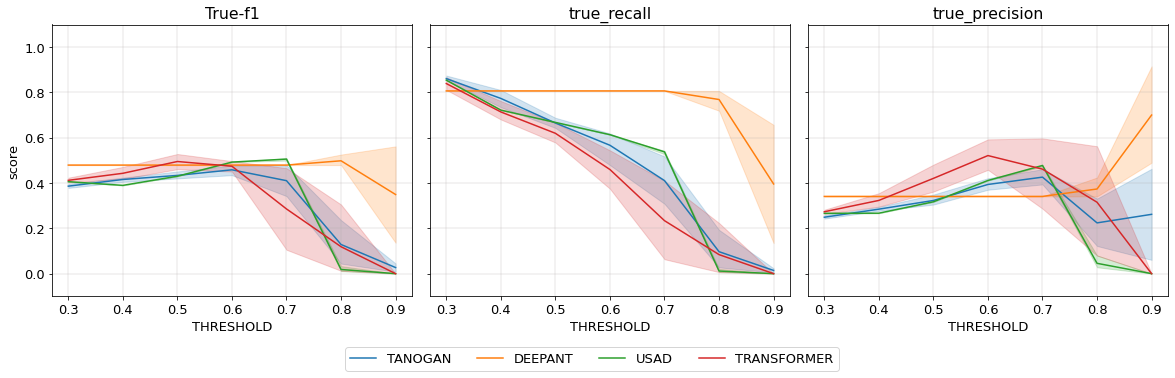

In [ ]:
font = {
    'size'   : 13
}

conf = {
    'SWAT': 30,
    'SMD': 30,
    'NAB_AD':100,
    'MSL': 30
 }
for d in conf:
  fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.05)
  # fig.suptitle("{}\n".format(d))
  print(d)
  for score,ax in zip(['True-f1','true_recall','true_precision'], axs):
    ax.set_ylim([-0.1, 1.1])
    for m in methods:
      data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== conf[d]) & (excel['DATASET'] == d)]
      sns.lineplot(data=data, x='THRESHOLD', y=score, ax=ax, label=m)
    ax.set(ylabel='score')
    ax.title.set_text(score)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.grid(color='#b0adac', linestyle='-', linewidth=0.3)
  fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.1))
  plt.rc('font', **font)
  plt.show()
  print()


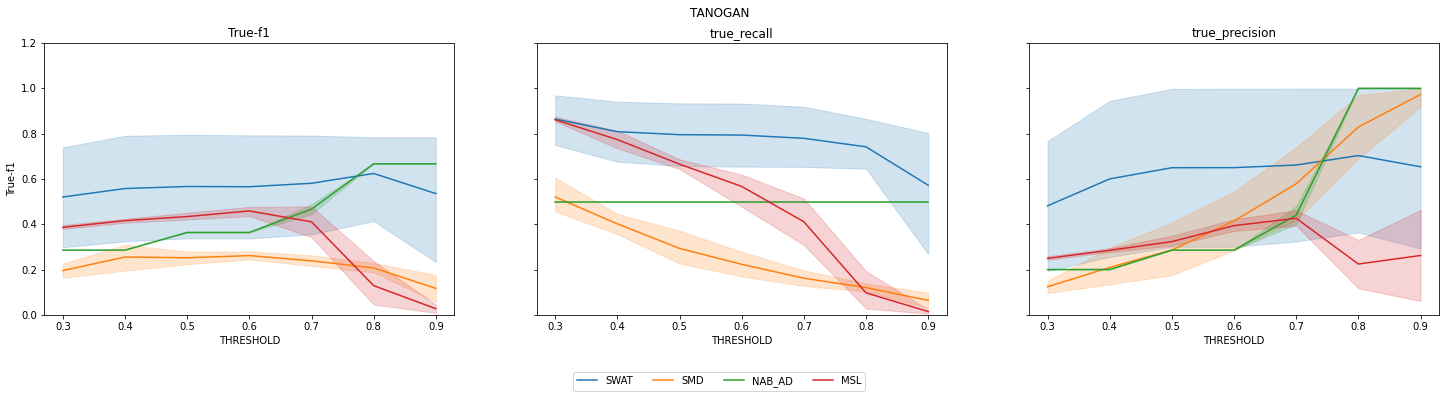

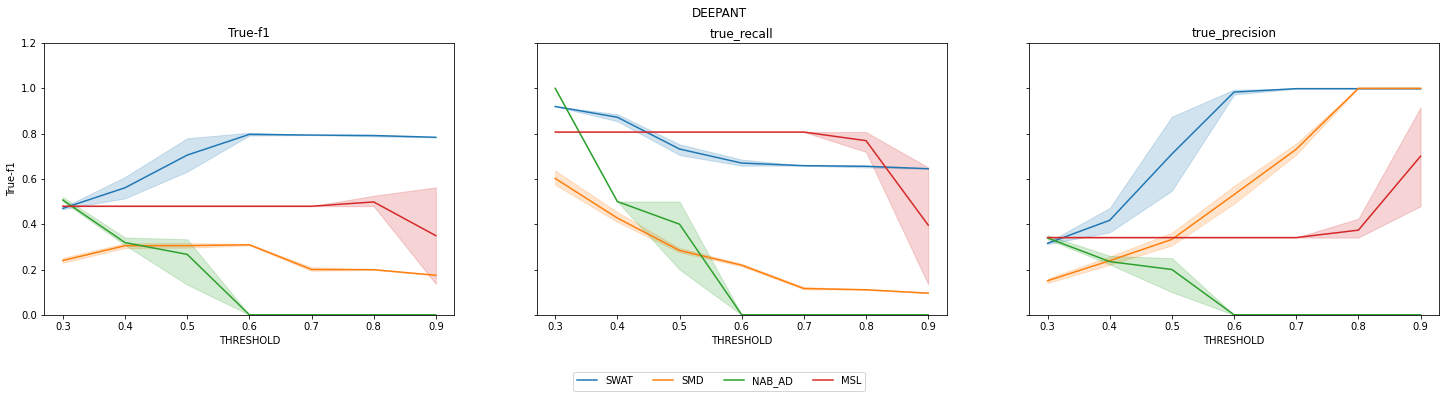

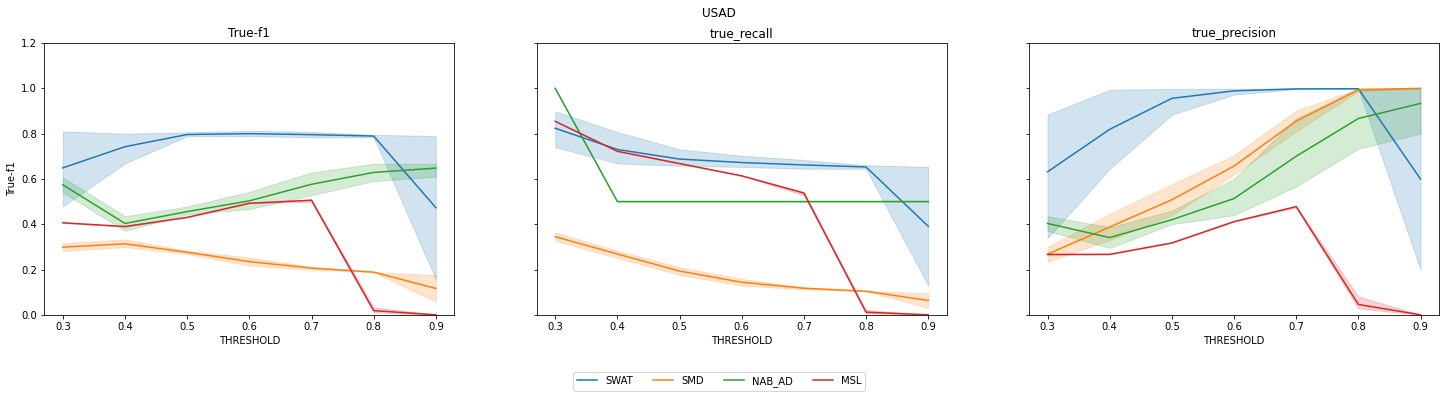

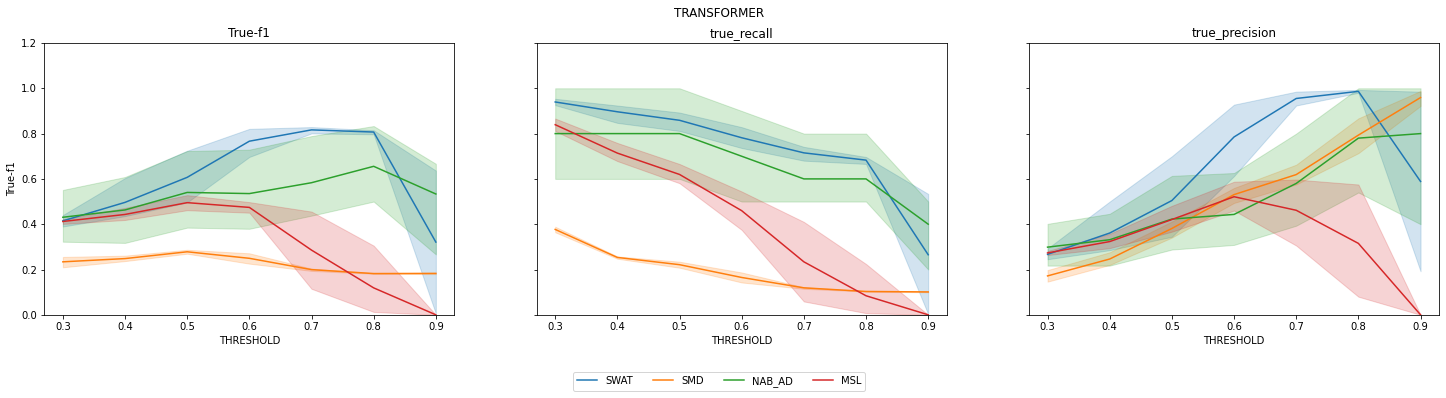

In [ ]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(25,5), sharey='row', subplot_kw=dict(frameon=True))
  # plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  for d in conf: 
    data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== conf[d]) & (excel['DATASET'] == d)]
    for score, ax in zip(['True-f1','true_recall','true_precision'], axs):
      ax.set_ylim([0, 1.2])
      sns.lineplot(data=data, x='THRESHOLD', y=score, ax=ax, label=d)
      ax.title.set_text(score)
      handles, labels = ax.get_legend_handles_labels()
      ax.get_legend().remove()
  fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.1))
  plt.show()
  print()

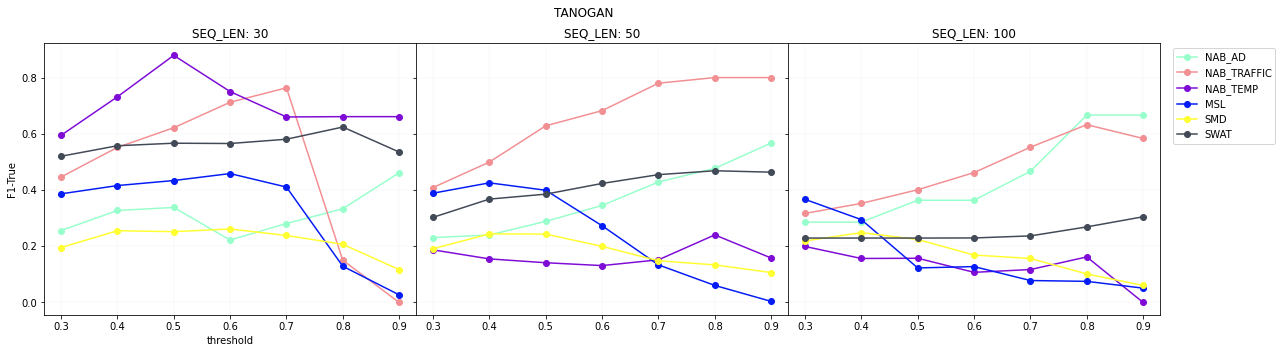

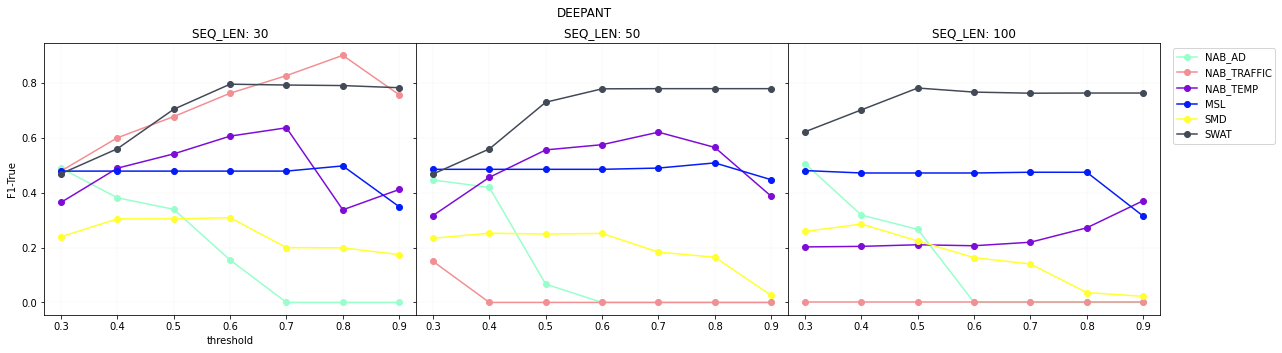

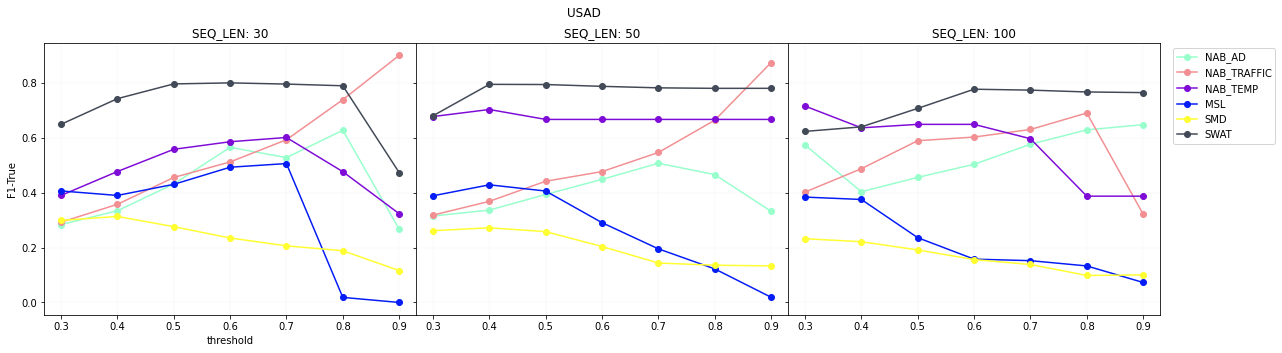

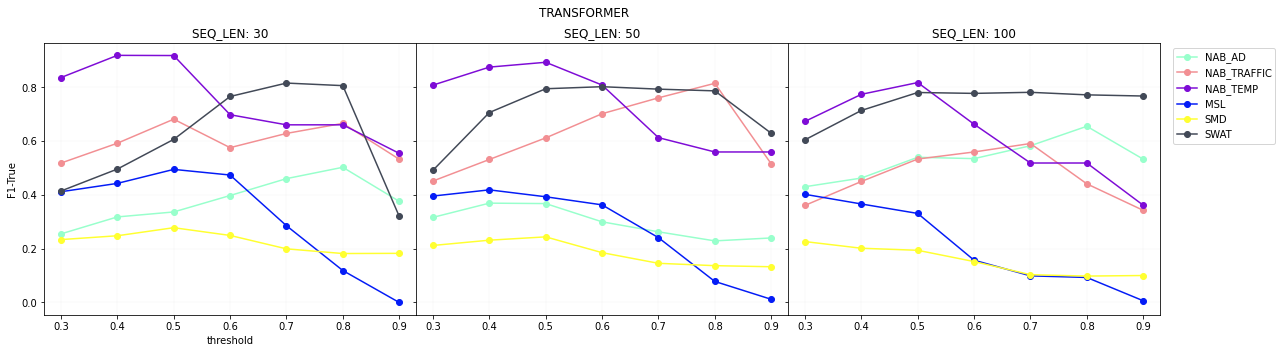

In [ ]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  
  for i,d in enumerate(datasets): 
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=d, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")

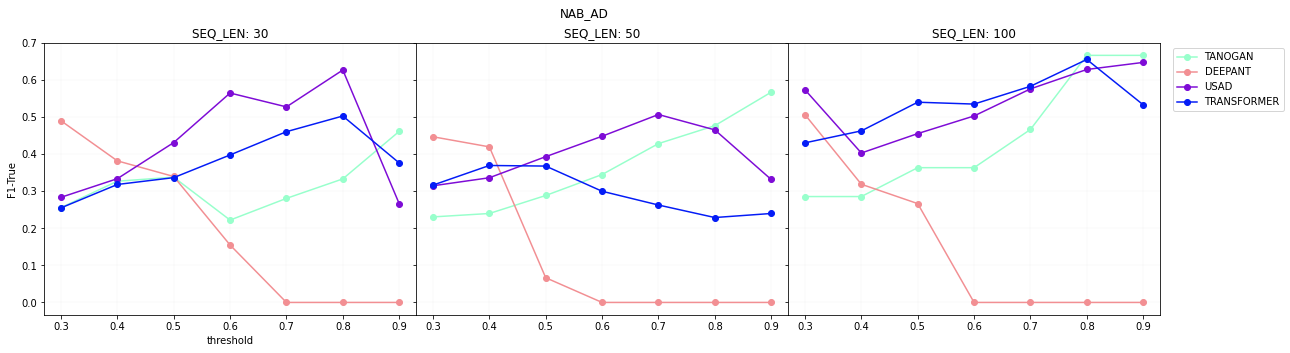

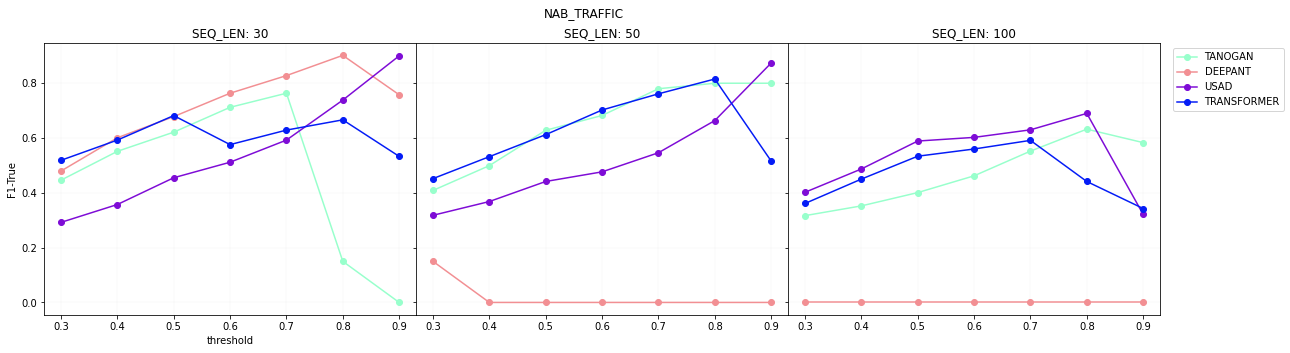

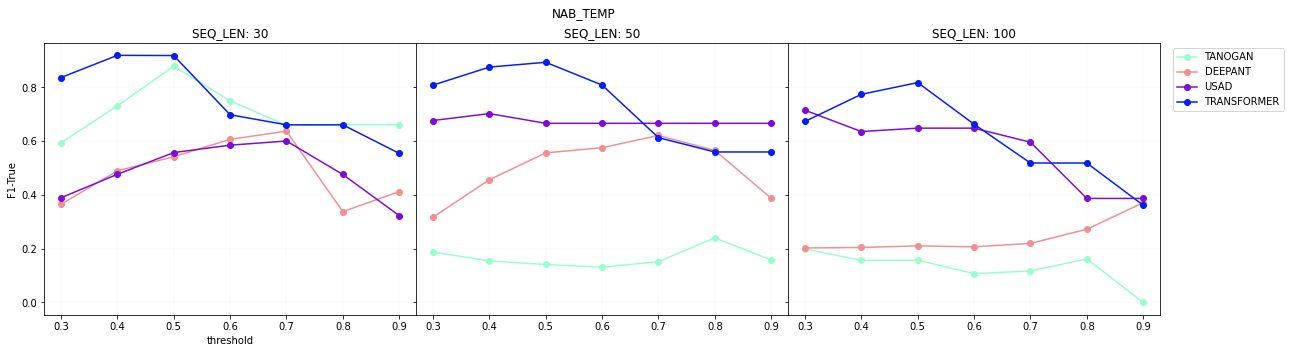

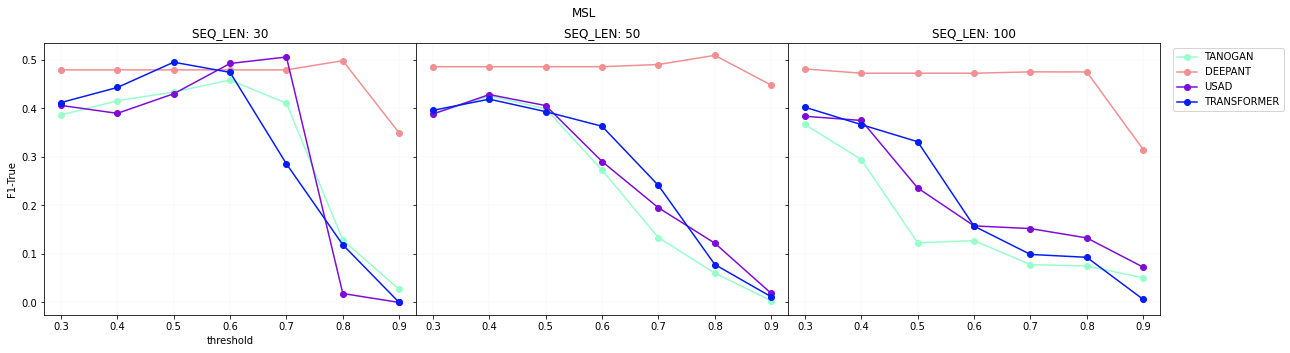

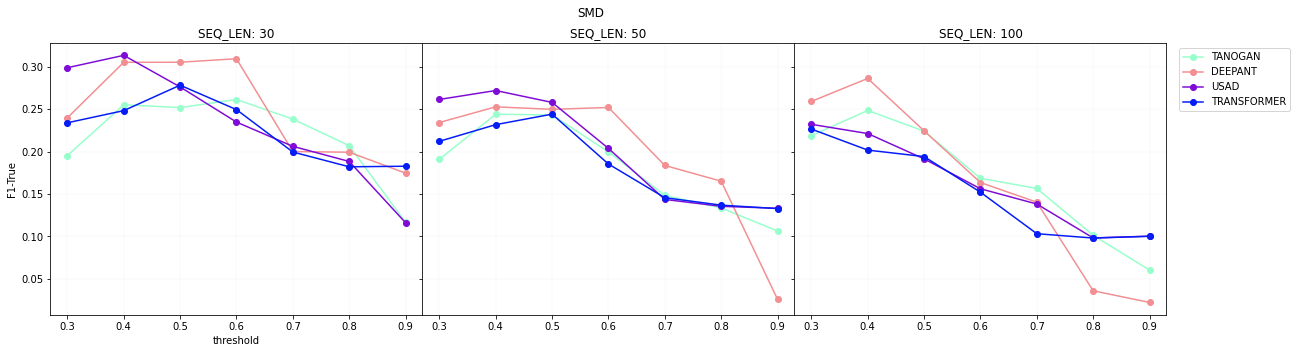

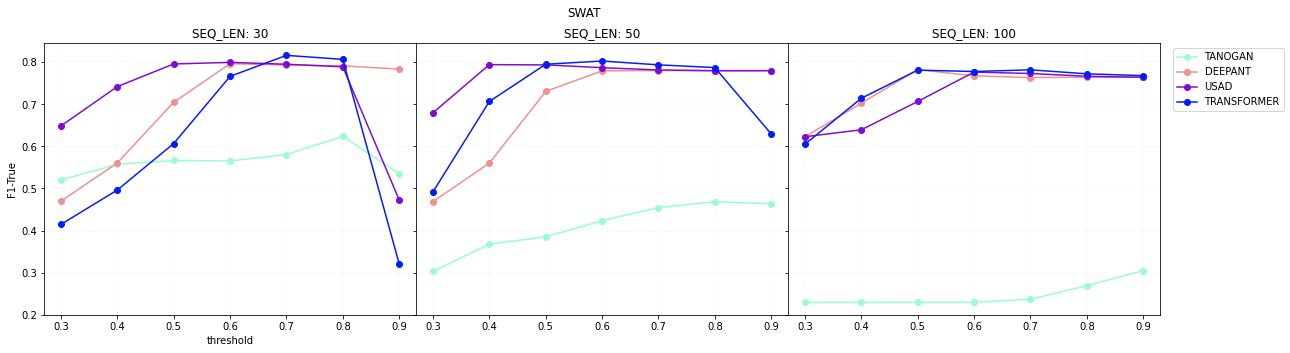

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(lengths), figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for i,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=m, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


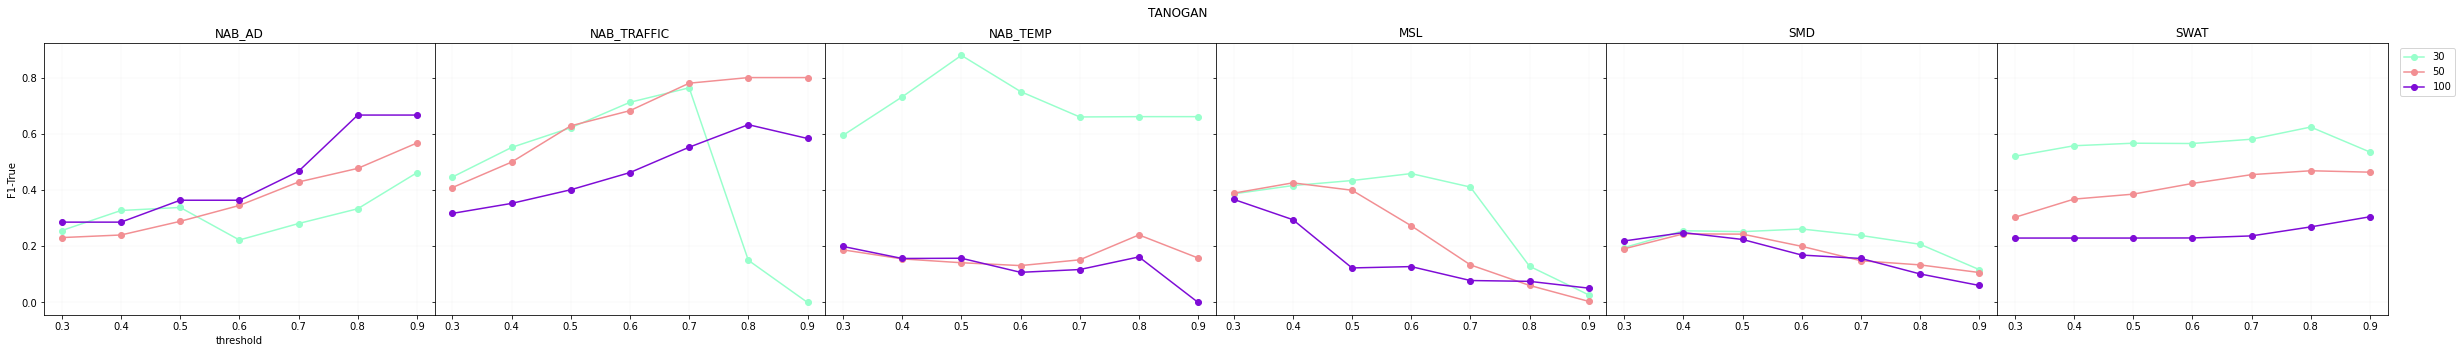

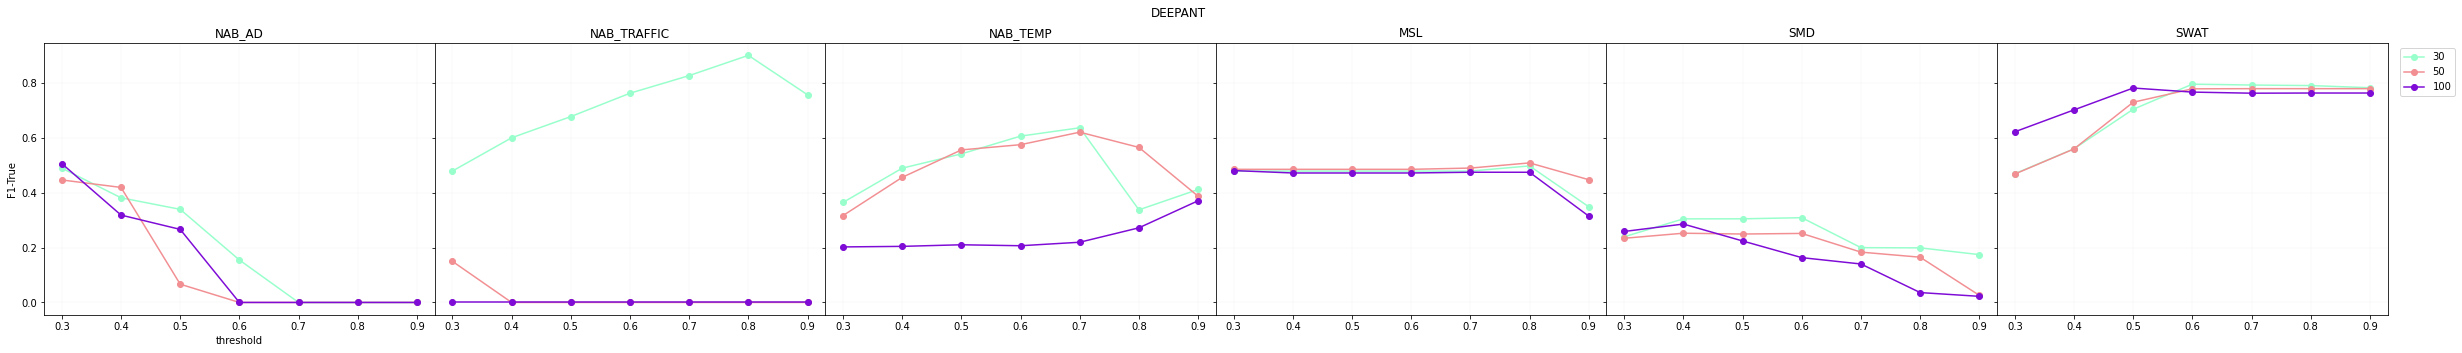

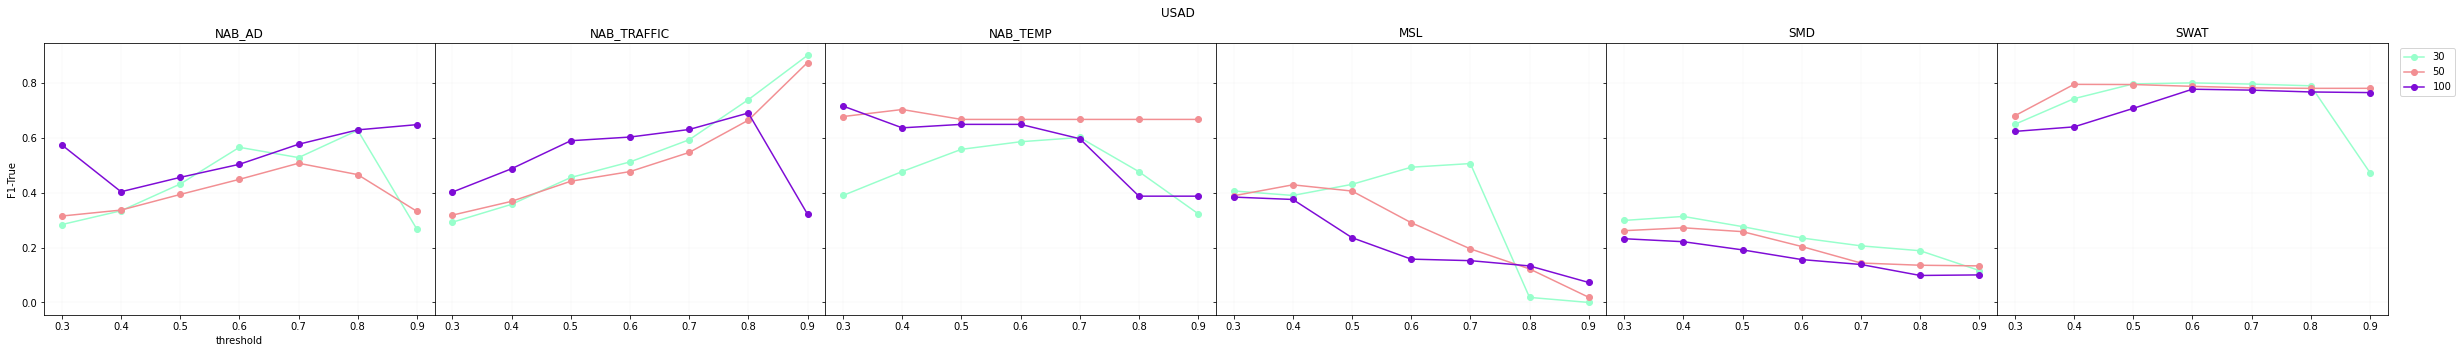

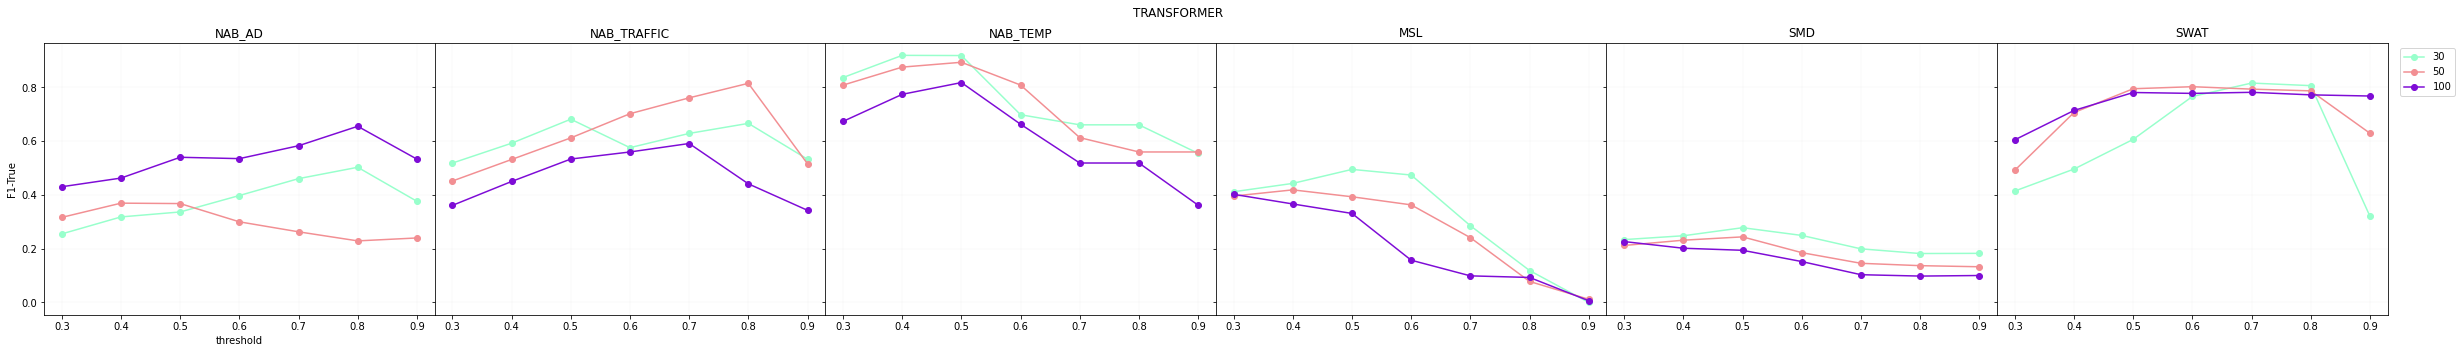

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]



for m in methods:
  fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*7,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  for j,d in enumerate(datasets):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(d))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")



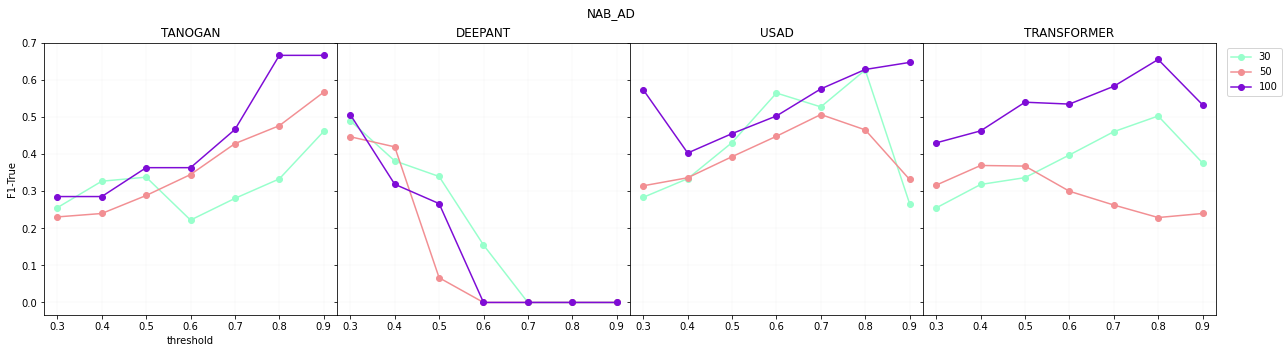

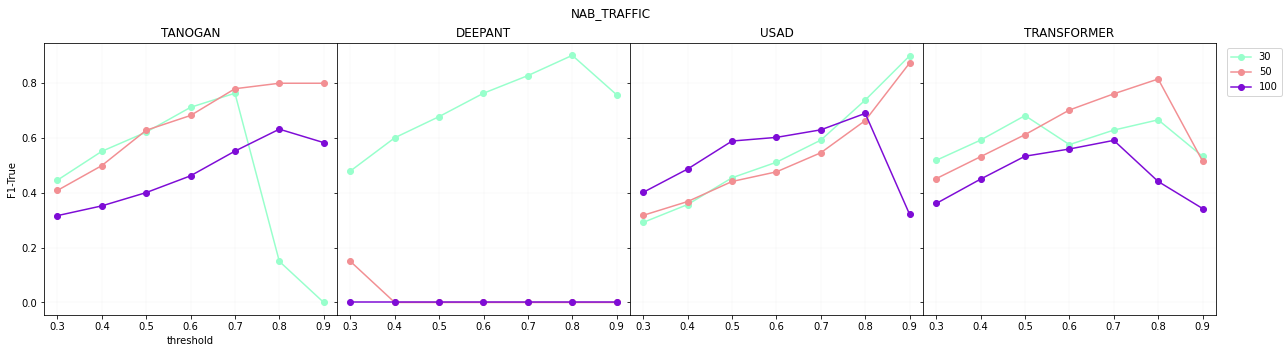

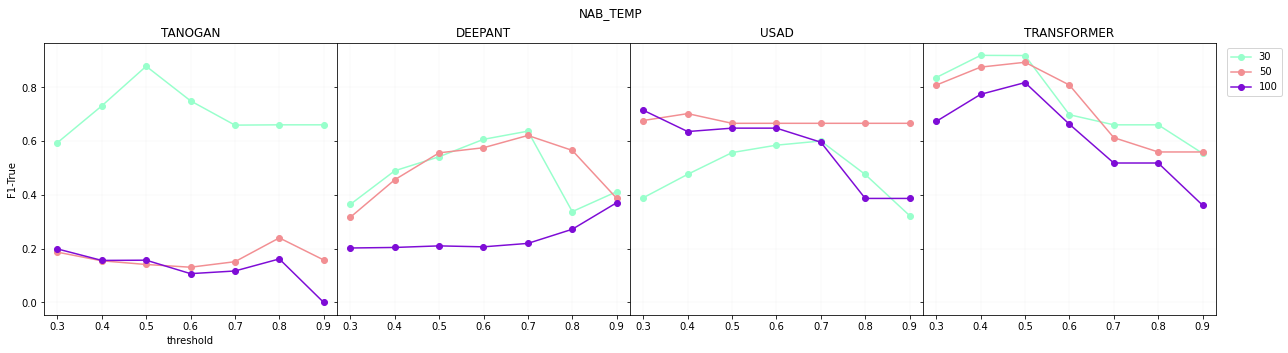

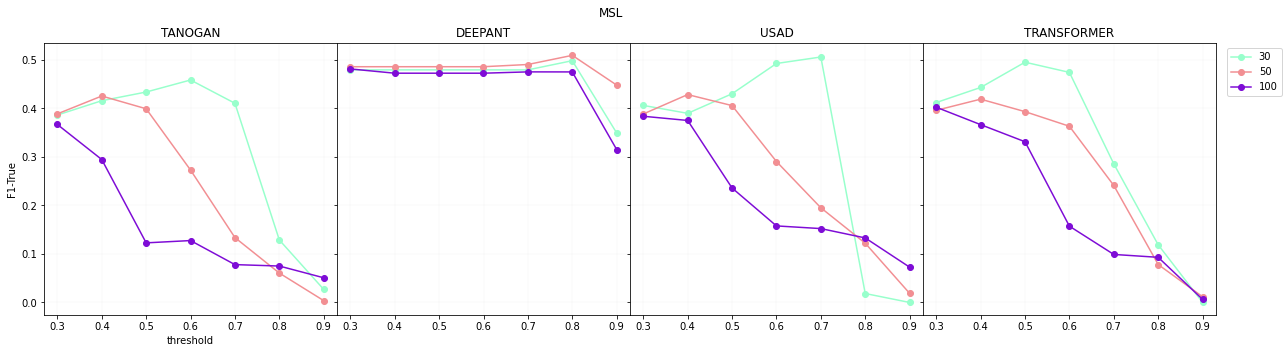

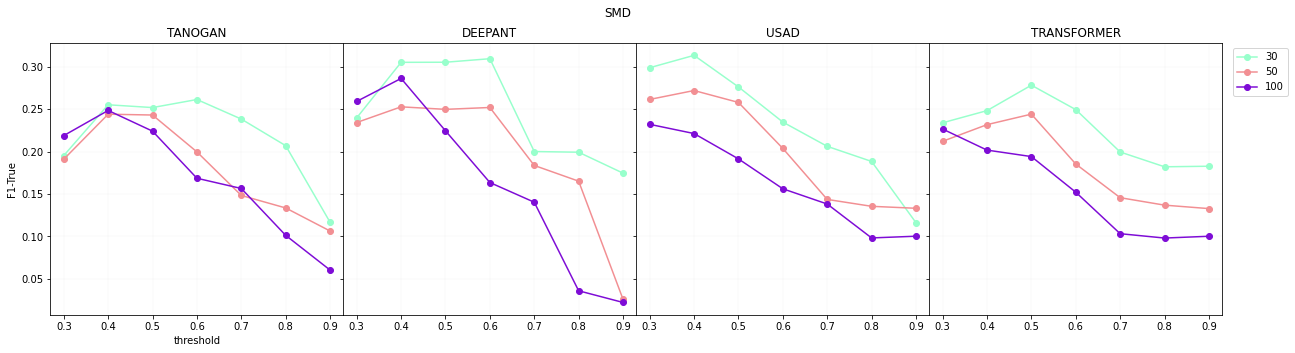

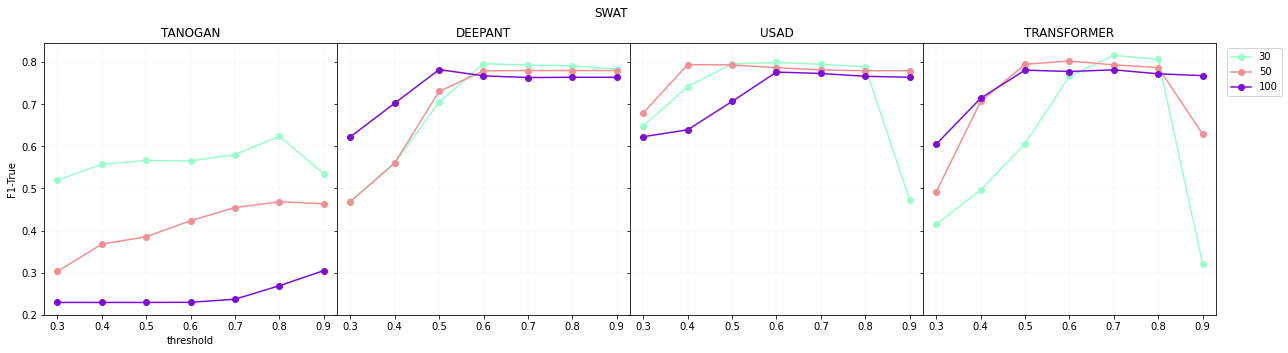

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(methods), figsize=(len(datasets)*3.5,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(m))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


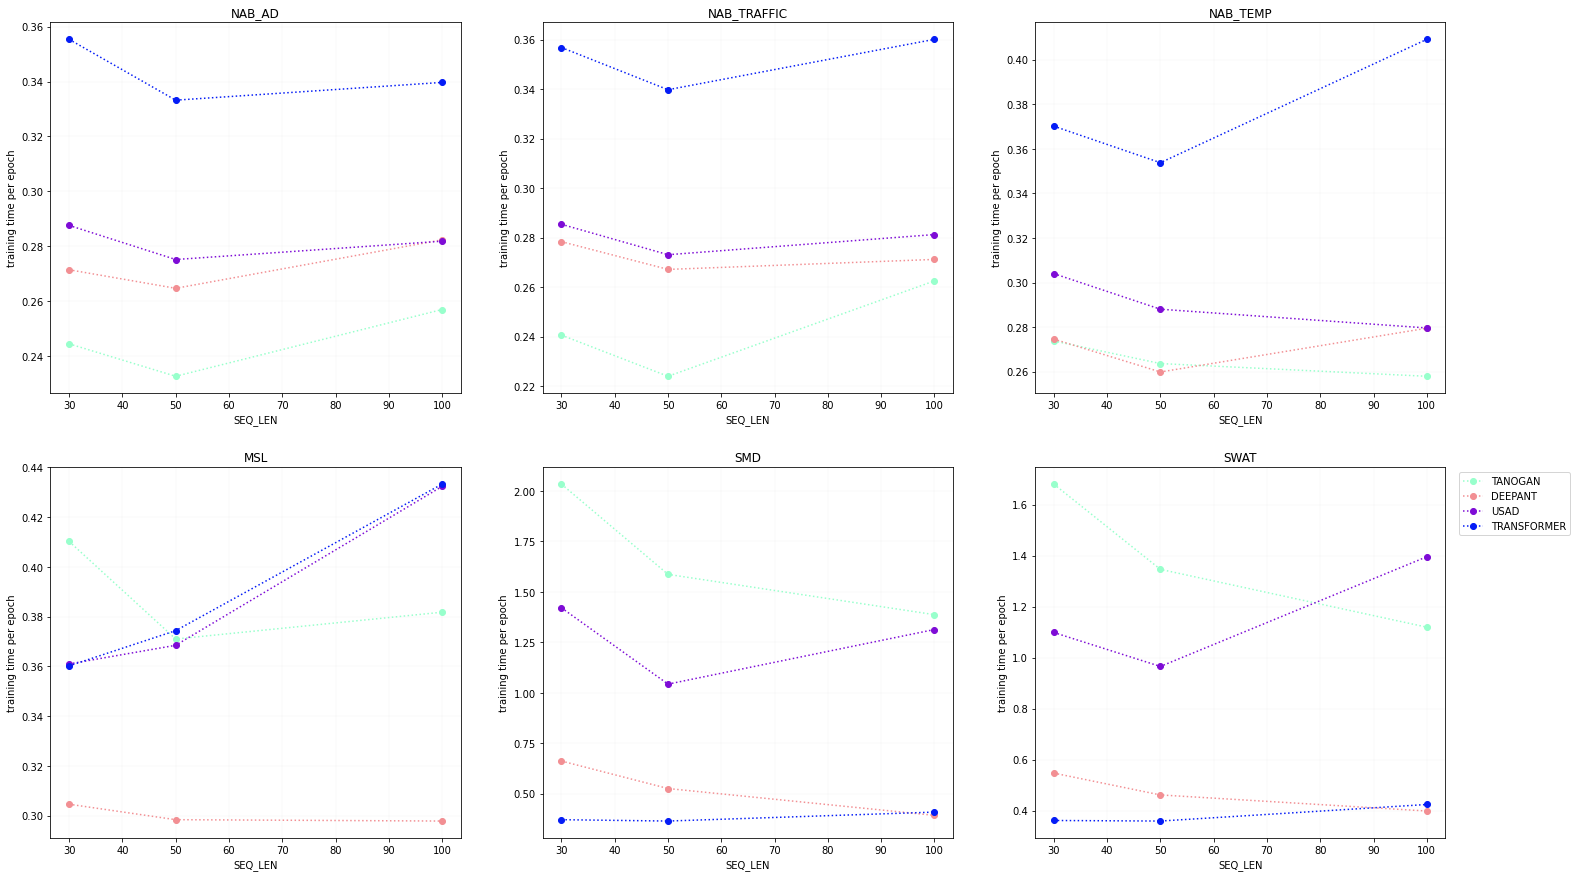

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

fig, axs = plt.subplots(2, 3, figsize=(25,15))
for i,d in enumerate(datasets):
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN']).mean().reset_index()
    axs.flat[i].plot(means['SEQ_LEN'],
              means['epoch_time'],
              label=m, 
              color=colors[j], 
              linestyle=styles[2],
              marker='o')
    axs.flat[i].grid(color='lightgrey', linestyle='-', linewidth=0.1)
    axs.flat[i].set_title("{}".format(d))
    axs.flat[i].set(xlabel="SEQ_LEN",ylabel="training time per epoch")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()
